<a href="https://colab.research.google.com/github/bhonsleaditya1/Lending-Club-PySpark/blob/master/Lending_Club_Neural_Nets_0vR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q bayesian-optimization
!pip install -q scikit-optimize

     |████████████████████████████████| 81kB 2.3MB/s 


In [ ]:
import os,gc,re,matplotlib,joblib,ast
import pandas as pd
import numpy as np
import seaborn as sns
from tqdm import tqdm
from sklearn.feature_selection import RFECV
from sklearn.model_selection  import StratifiedKFold,train_test_split,cross_validate
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler,StandardScaler,LabelEncoder,LabelBinarizer
from sklearn.impute import SimpleImputer
from sklearn.metrics import roc_auc_score,auc,roc_curve,accuracy_score,classification_report,confusion_matrix,f1_score
#from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
import xgboost as xgb
from scipy.stats import zscore
from sklearn import model_selection 
#from bayes_opt import BayesianOptimization
from sklearn.cluster import DBSCAN
from sklearn.multiclass import OneVsRestClassifier

In [ ]:
pdf = pd.read_csv('/content/drive/My Drive/Lending-Club/loanFinal.csv', header=0, escapechar='\\')
dropcol = pd.read_csv('/content/drive/My Drive/Lending-Club/FinalDrop.csv',header=None)[0].to_list()
dbindex = pd.read_csv('/content/drive/My Drive/Lending-Club/DBRemove.csv')
pdf = pdf[pdf.amnt_left_per<=100]
#pdf = pdf[pdf.amnt_left_per>=0]
pdf = pdf.drop(dropcol,axis=1)
#pdf=pdf[pdf['application_type'].isin(['Joint App','Individual'])]
#pdf=pdf[pdf['initial_list_status'].isin(['w','f'])]
pdf = pdf.drop(dbindex['index'].to_list())
pdf = pdf.reset_index().drop('index',axis=1)
pdf.count()
pdf['year'] = pd.DatetimeIndex(pdf['issue_d']).year
#pdf = pdf.drop(dt,axis=1)
reg = pdf.select_dtypes(['float64']).columns
clas = pdf.select_dtypes(['O']).columns

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (41,49,117,118,119,122,123,124,127) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
del pdf
gc.collect()

6232

In [ ]:
#OneHotEncoding 0 vs R 
pdf.loc[pdf['target']==2,'target']=1
p = pd.DataFrame(index=None)
for i in clas:
  if pdf[i].nunique()<25:
    l = pd.get_dummies(pdf[i], prefix=i)
    for j in l.columns:
      pdf[j] = l[j]
for i in clas:
  pdf = pdf.drop(i,axis=1)
pdf = pdf.rename(columns={'emp_length_< 1 year':'emp_length_less 1 year'})
timetest = pdf[pdf.year==2016]
train = pdf[pdf.year!=2016]
timetest = timetest.drop(['year'],axis=1)
train = train.drop(['year'],axis=1)
y_timetest=pd.DataFrame()
y_t = pd.DataFrame()
y_timetest['target'] = timetest['target']
y_t['target'] = train['target']
timetest = timetest.drop('target',axis=1)
train = train.drop('target',axis=1)
X_train, X_test, y_train, y_test = train_test_split(train, y_t, random_state=1301, test_size=0.3)
scale = StandardScaler()
imp = SimpleImputer(strategy="mean")
scale.fit(imp.fit_transform(X_train))
X_train = scale.transform(imp.fit_transform(X_train))
X_test = scale.transform(imp.fit_transform(X_test))
timetest = scale.transform(imp.fit_transform(timetest))
gc.collect()

12937

In [ ]:
#OneHotEncoding multi
#pdf.loc[pdf['target']==2,'target']=1
p = pd.DataFrame(index=None)
for i in clas:
  if pdf[i].nunique()<25:
    l = pd.get_dummies(pdf[i], prefix=i)
    for j in l.columns:
      pdf[j] = l[j]
for i in clas:
  pdf = pdf.drop(i,axis=1)
pdf = pdf.rename(columns={'emp_length_< 1 year':'emp_length_less 1 year'})
timetest = pdf[pdf.year==2016]
train = pdf[pdf.year!=2016]
timetest = timetest.drop(['year'],axis=1)
train = train.drop(['year'],axis=1)
y_timetest=pd.DataFrame()
y_t = pd.DataFrame()
y_timetest['target'] = timetest['target']
y_t['target'] = train['target']
timetest = timetest.drop('target',axis=1)
train = train.drop('target',axis=1)
X_train, X_test, y_train, y_test = train_test_split(train, y_t, random_state=1301, test_size=0.3)
scale = StandardScaler()
imp = SimpleImputer(strategy="mean")
scale.fit(imp.fit_transform(X_train))
X_train = scale.transform(imp.fit_transform(X_train))
X_test = scale.transform(imp.fit_transform(X_test))
timetest = scale.transform(imp.fit_transform(timetest))
gc.collect()

0

In [ ]:
np.isnan(X_train).sum()

0

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(128,128), max_iter=100,activation='tanh',solver='sgd',learning_rate='adaptive',verbose=True)
mlp.fit(X_train, y_train.values.ravel())

Iteration 1, loss = 0.47091916
Iteration 2, loss = 0.46338859
Iteration 3, loss = 0.46227072
Iteration 4, loss = 0.46149161
Iteration 5, loss = 0.46088581
Iteration 6, loss = 0.46036374
Iteration 7, loss = 0.45990628
Iteration 8, loss = 0.45950606
Iteration 9, loss = 0.45915228
Iteration 10, loss = 0.45880015
Iteration 11, loss = 0.45852303
Iteration 12, loss = 0.45821272
Iteration 13, loss = 0.45794337
Iteration 14, loss = 0.45767192
Iteration 15, loss = 0.45742802
Iteration 16, loss = 0.45720538
Iteration 17, loss = 0.45697624
Iteration 18, loss = 0.45675581
Iteration 19, loss = 0.45654226
Iteration 20, loss = 0.45632984
Iteration 21, loss = 0.45614867
Iteration 22, loss = 0.45595183
Iteration 23, loss = 0.45577443
Iteration 24, loss = 0.45560536
Iteration 25, loss = 0.45541220
Iteration 26, loss = 0.45525486
Iteration 27, loss = 0.45511032
Iteration 28, loss = 0.45493958
Iteration 29, loss = 0.45481650
Iteration 30, loss = 0.45463554
Iteration 31, loss = 0.45450092
Iteration 32, los

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(128, 128), learning_rate='adaptive',
              learning_rate_init=0.001, max_fun=15000, max_iter=100,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='sgd',
              tol=0.0001, validation_fraction=0.1, verbose=True,
              warm_start=False)

In [ ]:
np.unique(np.argmax(model.predict(X_test), axis=-1))

array([0])

In [ ]:
y_pred = model.predict_classes(X_test)
y_predtrain = model.predict_classes(X_train)
y_predtime = model.predict_classes(timetest)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_train,y_predtrain))
print(classification_report(y_train,y_predtrain))
print(confusion_matrix(y_timetest,y_predtime))
print(classification_report(y_timetest,y_predtime))

[[159117  89670]
 [ 21032  44629]]
              precision    recall  f1-score   support

           0       0.88      0.64      0.74    248787
           1       0.33      0.68      0.45     65661

    accuracy                           0.65    314448
   macro avg       0.61      0.66      0.59    314448
weighted avg       0.77      0.65      0.68    314448

[[369847 209528]
 [ 48730 105607]]
              precision    recall  f1-score   support

           0       0.88      0.64      0.74    579375
           1       0.34      0.68      0.45    154337

    accuracy                           0.65    733712
   macro avg       0.61      0.66      0.60    733712
weighted avg       0.77      0.65      0.68    733712

[[120585  84227]
 [ 21219  52072]]
              precision    recall  f1-score   support

           0       0.85      0.59      0.70    204812
           1       0.38      0.71      0.50     73291

    accuracy                           0.62    278103
   macro avg       0.62

0.36025876010983104
0.4044660342979398


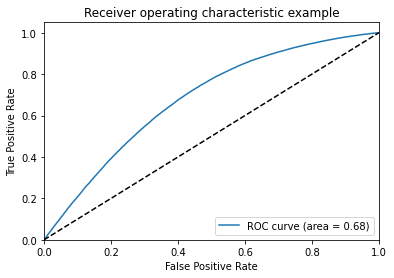

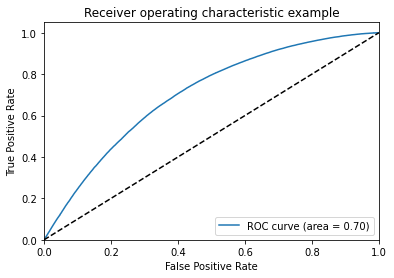

0.0
0.35895823922495906
0.3859437393463532


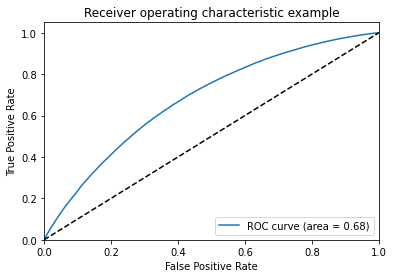

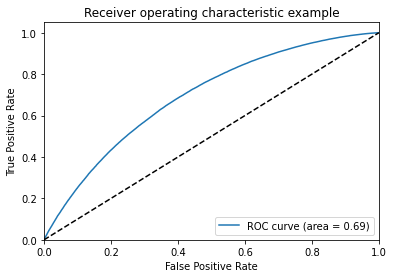

0.0
0.3614732559849785
0.4052732233898362


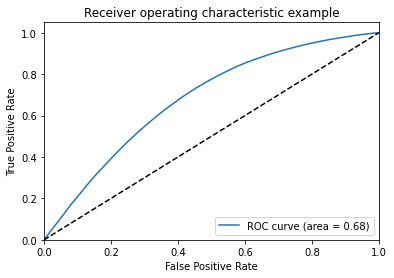

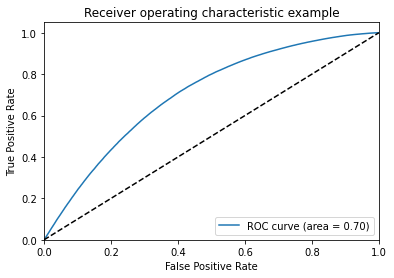

0.0


In [ ]:
fpr = dict()
tpr = dict()
roc_auc = dict()
gini =0
j=2
y_predtrain=model.predict_proba(X_train)
y_pred=model.predict_proba(X_test)
y_predtime=model.predict_proba(timetest)
drop_enc = OneHotEncoder().fit(pd.DataFrame(y_test))
y_gini = drop_enc.transform(pd.DataFrame(y_test)).toarray()
drop_enc = OneHotEncoder().fit(pd.DataFrame(y_timetest))
y_ginitime = drop_enc.transform(pd.DataFrame(y_timetest)).toarray()
drop_enc = OneHotEncoder().fit(pd.DataFrame(y_train))
y_ginitrain = drop_enc.transform(pd.DataFrame(y_train)).toarray()
for i in range(j):
    fpr[i], tpr[i], _ = roc_curve(y_gini[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    print(2*roc_auc[i]-1)
for i in range(j):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
print(gini/j)
gini=0
for i in range(j):
    fpr[i], tpr[i], _ = roc_curve(y_ginitime[:, i], y_predtime[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    print(2*roc_auc[i]-1)
for i in range(j):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
print(gini/j)
gini=0
for i in range(j):
    fpr[i], tpr[i], _ = roc_curve(y_ginitrain[:, i], y_predtrain[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    print(2*roc_auc[i]-1)
for i in range(j):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
print(gini/j)

In [ ]:
#@title PyTorch
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

EPOCHS = 50
#BATCH_SIZE = 64
LEARNING_RATE = 0.001
CLASSES=2

## train data
class trainData(Dataset):

    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data
        
    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]
        
    def __len__ (self):
        return len(self.X_data)


train_data = trainData(torch.FloatTensor(X_train), 
                       #torch.nn.functional.one_hot(torch.IntTensor(np.array(y_train['target'])).to(torch.int64)))
                       torch.LongTensor(np.array(y_train['target'])))
## test data    
class testData(Dataset):
    
    def __init__(self, X_data):
        self.X_data = X_data
        
    def __getitem__(self, index):
        return self.X_data[index]
        
    def __len__ (self):
        return len(self.X_data)
    

test_data = testData(torch.FloatTensor(X_test))
time_data = testData(torch.FloatTensor(timetest))

train_loader = DataLoader(dataset=train_data, shuffle=True)
test_loader = DataLoader(dataset=test_data)
time_loader = DataLoader(dataset=time_data)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

class binaryClassification(nn.Module):
    def __init__(self,input_dim=88,layer1=150,layer2=150,drp=0.2,output=2):
        super().__init__() 
        self.net = nn.Sequential(
            nn.Linear(input_dim,layer1),
            nn.ReLU(),
            nn.Dropout(drp),
            nn.Linear(layer1,layer2),
            nn.ReLU(),
            nn.Dropout(drp),
            nn.Linear(layer2,output)  
          )       # Number of input features is 12.
        #self.layer_1 = nn.Linear(88, 150) 
        #self.layer_2 = nn.Linear(150, 150)
        #self.layer_out = nn.Linear(64, n_classes) 
        
        #self.relu = nn.ReLU()
        #self.dropout = nn.Dropout(p=0.1)
        #self.batchnorm1 = nn.BatchNorm1d(64)
        #self.batchnorm2 = nn.BatchNorm1d(64)
        
    def forward(self, inputs):
        #x = self.relu(self.layer_1(inputs))
        #x = self.batchnorm1(x)
        #x = self.relu(self.layer_2(x))
        #x = self.batchnorm2(x)
        #x = self.dropout(x)
        #x = self.layer_out(x)
        x = self.net(inputs)

        return x

model = binaryClassification()
model.to(device)

print(model)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(),lr = LEARNING_RATE)

def binary_acc(y_pred, y_test):
    y_pred_tag = torch.round(torch.sigmoid(y_pred))

    correct_results_sum = (y_pred_tag == y_test).sum().float()
    acc = correct_results_sum/y_test.shape[0]
    acc = torch.round(acc * 100)
    
    return acc

model.train()
for e in range(1, EPOCHS+1):
    epoch_loss = 0
    epoch_acc = 0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        
        y_pred = model(X_batch)
        
        loss = criterion(y_pred, y_batch)
        acc = binary_acc(y_pred, y_batch)
        
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()
        epoch_acc += acc.item()
        
    print(f'Epoch {e+0:03}: | Loss: {epoch_loss/len(train_loader):.5f} | Acc: {epoch_acc/len(train_loader):.3f}')
model.eval()

In [ ]:
!pip install keras-tuner

     |████████████████████████████████| 61kB 2.2MB/s 
  Created wheel for keras-tuner: filename=keras_tuner-1.0.1-cp36-none-any.whl size=73200 sha256=e598a0ad0f18cd6849efae1a48a72bd48f0f93e95a748b9d1bd2e950db3e4fc6
  Stored in directory: /root/.cache/pip/wheels/b9/cc/62/52716b70dd90f3db12519233c3a93a5360bc672da1a10ded43
  Created wheel for terminaltables: filename=terminaltables-3.1.0-cp36-none-any.whl size=15356 sha256=bc2b0c1a30349c9c707d3c03f1ab02a99713624f48d49537bfd28ab4c1ea07d0
  Stored in directory: /root/.cache/pip/wheels/30/6b/50/6c75775b681fb36cdfac7f19799888ef9d8813aff9e379663e
Successfully built keras-tuner terminaltables


In [ ]:
!pip install -q keras-tuner

     |████████████████████████████████| 61kB 2.1MB/s 


In [ ]:
# define the keras model
model = Sequential()
model.add(Dense(512, input_dim=88, activation='tanh'))
model.add(Dropout(0.1))
model.add(Dense(256, activation='tanh'))
model.add(Dropout(0.1))
model.add(Dense(3, activation='softmax'))

In [ ]:
#@title Default title text
def tune_nn_model(hp):
    model = keras.Sequential()
    
    activation = hp.Choice('activation',['softmax','softplus','softsign','relu','tanh','sigmoid','hard_sigmoid','linear'])

    model.add(keras.layers.Dense(units=128,
                                 activation="relu",
                                 input_shape=[X_train.shape[1]]))

    for i in range(hp.Int('num_layers', 1, 6)):

      units = hp.Int(
          'units_' + str(i),

          min_value=64,

          max_value=512,

          step=64

      )

      model.add(keras.layers.Dense(units=units, activation='relu'))

      drop_rate = hp.Choice('drop_rate_' + str(i),

                            [0.0, 0.1, 0.2, 0.3, 0.4,
                              0.5, 0.6, 0.7, 0.8, 0.9
                            ])

      model.add(keras.layers.Dropout(rate=drop_rate))

    model.add(keras.layers.Dense(1, activation='sigmoid'))

    model.compile(

        optimizer="adam",

        loss = 'binary_crossentropy',

        metrics = ['accuracy'])

    return model

In [ ]:
def auroc(y_true, y_pred):
    return tensorflow.py_function(calc_gini, (y_true, y_pred), tensorflow.double)

In [ ]:
def calc_gini(y,y_p,j=2):
  gini ={}
  fpr={}
  tpr={}
  roc_auc={}
  g=0
  if j==1:
    fpr, tpr, _ = roc_curve(y, y_p)
    roc_auc = auc(fpr, tpr)
    gini=2*roc_auc-1 
  else:
    y_g = OneHotEncoder().fit_transform(pd.DataFrame(y)).toarray()
    for i in range(j):
      fpr[i], tpr[i], _ = roc_curve(y_g[:, i], y_p[:, i])
      roc_auc[i] = auc(fpr[i], tpr[i])
      gini[i]=2*roc_auc[i]-1   
  gc.collect()
  return gini

In [ ]:
tuner_bo.get_best_models(num_models=1)[0]

In [ ]:
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-6,
    decay_steps=10000,
    decay_rate=0.9)
sgd = keras.optimizers.Adagrad(learning_rate=lr_schedule)

model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=[keras.metrics.AUC()])

In [ ]:
np.unique(y_train)

array([0, 1, 2])

In [ ]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced',np.unique(y_train),y_train.target)

In [ ]:
dict(zip(np.unique(y_train),class_weights))

{0: 0.4221284430061129, 1: 3.2039545506152787, 2: 3.1354007751838604}

In [ ]:
model.fit(X_train, np_utils.to_categorical(y_train), epochs=200, batch_size=2048,class_weight=dict(zip(np.unique(y_train),class_weights)))

Epoch 1/200
359/359 [==============================] - 4s 12ms/step - loss: 1.2037 - auc_1: 0.4959
Epoch 2/200
359/359 [==============================] - 4s 12ms/step - loss: 1.2029 - auc_1: 0.4963
Epoch 3/200
359/359 [==============================] - 4s 12ms/step - loss: 1.2019 - auc_1: 0.4960
Epoch 4/200
359/359 [==============================] - 4s 12ms/step - loss: 1.2015 - auc_1: 0.4959
Epoch 5/200
359/359 [==============================] - 4s 12ms/step - loss: 1.2002 - auc_1: 0.4965
Epoch 6/200
359/359 [==============================] - 4s 12ms/step - loss: 1.2005 - auc_1: 0.4968
Epoch 7/200
359/359 [==============================] - 4s 12ms/step - loss: 1.1993 - auc_1: 0.4974
Epoch 8/200
359/359 [==============================] - 4s 12ms/step - loss: 1.1989 - auc_1: 0.4974
Epoch 9/200
359/359 [==============================] - 4s 12ms/step - loss: 1.1974 - auc_1: 0.4981
Epoch 10/200
359/359 [==============================] - 4s 12ms/step - loss: 1.1979 - auc_1: 0.4978
Epoch 11/

In [ ]:
model.predict_classes(X_train)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
import numpy as np
np.random.seed()
import pandas as pd
from datetime import datetime
from sklearn.metrics import log_loss, roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import MinMaxScaler

from keras.models import load_model
from keras.models import Sequential, Model
from keras.layers import Input, Dense, Dropout, Activation
from keras.layers.normalization import BatchNormalization
from keras.callbacks import EarlyStopping, ModelCheckpoint, CSVLogger, Callback
from keras.wrappers.scikit_learn import KerasClassifier

class roc_auc_callback(Callback):
    def __init__(self,training_data,validation_data):
        self.x = training_data[0]
        self.y = training_data[1]
        self.x_val = validation_data[0]
        self.y_val = validation_data[1]

    def on_train_begin(self, logs={}):
        return

    def on_train_end(self, logs={}):
        return

    def on_epoch_begin(self, epoch, logs={}):
        return

    def on_epoch_end(self, epoch, logs={}):
        y_pred = self.model.predict_proba(self.x, verbose=0)
        roc = roc_auc_score(self.y, y_pred)
        logs['roc_auc'] = roc_auc_score(self.y, y_pred)
        logs['norm_gini'] = ( roc_auc_score(self.y, y_pred) * 2 ) - 1

        y_pred_val = self.model.predict_proba(self.x_val, verbose=0)
        roc_val = roc_auc_score(self.y_val, y_pred_val)
        logs['roc_auc_val'] = roc_auc_score(self.y_val, y_pred_val)
        logs['norm_gini_val'] = ( roc_auc_score(self.y_val, y_pred_val) * 2 ) - 1

        print('\rroc_auc: %s - roc_auc_val: %s - norm_gini: %s - norm_gini_val: %s' % (str(round(roc,5)),str(round(roc_val,5)),str(round((roc*2-1),5)),str(round((roc_val*2-1),5))), end=10*' '+'\n')
        return

    def on_batch_begin(self, batch, logs={}):
        return

    def on_batch_end(self, batch, logs={}):
        return

folds = 4
runs = 2

cv_LL = 0
cv_AUC = 0
cv_gini = 0
fpred = []
avpred = []
avreal = []
avids = []
patience = 10
batchsize = 2048

def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod(
            (datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' %
              (thour, tmin, round(tsec, 2)))

In [ ]:
# Let's split the data into folds. I always use the same random number for reproducibility, 
# and suggest that you do the same (you certainly don't have to use 1001).

#skf = StratifiedKFold(n_splits=folds, random_state=1001)
#starttime = timer(None)
#for i, (train_index, test_index) in enumerate(skf.split(X_train,y_train)):
#    start_time = timer(None)
#    X1, X_val1 = X_train[train_index], X_train[test_index]
#    y1, y_val1 = y_train[train_index], y_train[test_index]
    #train_ids, val_ids = tr_ids[train_index], tr_ids[test_index]
    
# This is where we define and compile the model. These parameters are not optimal, as they were chosen 
# to get a notebook to complete in 60 minutes. Other than leaving BatchNormalization and last sigmoid 
# activation alone, virtually everything else can be optimized: number of neurons, types of initializers, 
# activation functions, dropout values. The same goes for the optimizer at the end.

#########
# Never move this model definition to the beginning of the file or anywhere else outside of this loop. 
# The model needs to be initialized anew every time you run a different fold. If not, it will continue 
# the training from a previous model, and that is not what you want.
#########

    # This definition must be within the for loop or else it will continue training previous model
def baseline_model():
    model = Sequential()
    model.add(
        Dense(
            256,
            input_dim=X_train.shape[1],
            kernel_initializer='glorot_normal',
            ))
    model.add(Activation('tanh'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(256, kernel_initializer='glorot_normal'))
    model.add(Activation('tanh'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    #model.add(Dense(50, kernel_initializer='glorot_normal'))
    #model.add(Activation('relu'))
    #model.add(BatchNormalization())
    #model.add(Dropout(0.15))
    #model.add(Dense(25, kernel_initializer='glorot_normal'))
    #model.add(Activation('relu'))
    #model.add(BatchNormalization())
    #model.add(Dropout(0.1))
    model.add(Dense(2, activation='sigmoid'))

    # Compile model
    lr_schedule = keras.optimizers.schedules.ExponentialDecay(
        initial_learning_rate=1e-6,
        decay_steps=10000,
        decay_rate=0.9)
    sgd = keras.optimizers.Adagrad(learning_rate=lr_schedule)

    model.compile(loss='categorical_crossentropy', optimizer='adagrad', metrics=[keras.metrics.AUC()])
    #model.compile(optimizer='Ada', metrics = ['accuracy'], loss='binary_crossentropy')

    return model

# This is where we repeat the runs for each fold. If you choose runs=1 above, it will run a 
# regular N-fold procedure.

#########
# It is important to leave the call to random seed here, so each run starts with a different seed.
#########

for run in range(runs):
    print('\n Fold %d - Run %d\n' % ((i + 1), (run + 1)))
    np.random.seed()

# Lots to unpack here.

# The first callback prints out roc_auc and gini values at the end of each epoch. It must be listed 
# before the EarlyStopping callback, which monitors gini values saved in the previous callback. Make 
# sure to set the mode to "max" because the default value ("auto") will not handle gini properly 
# (it will act as if the model is not improving even when roc/gini go up).

# CSVLogger creates a record of all iterations. Not really needed but it doesn't hurt to have it.

# ModelCheckpoint saves a model each time gini improves. Its mode also must be set to "max" for reasons 
# explained above.

callbacks = [
    roc_auc_callback(training_data=(X_train, to_categorical(y_train)),validation_data=(X_test, to_categorical(y_test))),  # call this before EarlyStopping
    EarlyStopping(monitor='norm_gini_val', patience=patience, mode='max', verbose=1),
    CSVLogger('keras-5fold-run-01-v1-epochs.log', separator=',', append=False),
    ModelCheckpoint(
            'keras-5fold-run-01-v1-fold-' + str('%02d' % (i + 1)) + '-run-' + str('%02d' % (run + 1)) + '.check',
            monitor='norm_gini_val', mode='max', # mode must be set to max or Keras will be confused
            save_best_only=True,
            verbose=1)
]

# The classifier is defined here. Epochs should be be set to a very large number (not 3 like below) which 
# will never be reached anyway because of early stopping. I usually put 5000 there. Because why not.

nnet = KerasClassifier(
    build_fn=baseline_model,
# Epoch needs to be set to a very large number ; early stopping will prevent it from reaching
#            epochs=5000,
    epochs=500,
    batch_size=batchsize,
    validation_data=(X_test, to_categorical(y_test)),
    verbose=2,
    shuffle=True,
    callbacks=callbacks)

from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced',np.unique(y_train),y_train.target)

fit = nnet.fit(X_train,to_categorical(y_train),class_weight=dict(zip(np.unique(y_train),class_weights)))
        
# We want the best saved model - not the last one where the training stopped. So we delete the old 
# model instance and load the model from the last saved checkpoint. Next we predict values both for 
# validation and test data, and create a summary of parameters for each run.

del nnet
nnet = model.load_model('keras-5fold-run-01-v1-fold-' + str('%02d' % (i + 1)) + '-run-' + str('%02d' % (run + 1)) + '.check')
scores_val_run = nnet.predict_proba(X_test, verbose=0)
LL_run = log_loss(X_test, scores_val_run)
print('\n Fold %d Run %d Log-loss: %.5f' % ((i + 1), (run + 1), LL_run))
AUC_run = roc_auc_score(to_categorical(y_test), scores_val_run)
print(' Fold %d Run %d AUC: %.5f' % ((i + 1), (run + 1), AUC_run))
print(' Fold %d Run %d normalized gini: %.5f' % ((i + 1), (run + 1), AUC_run*2-1))
y_pred_run = nnet.predict_proba(timetest, verbose=0)
if run > 0:
    scores_val = scores_val + scores_val_run
    y_pred = y_pred + y_pred_run
else:
    scores_val = scores_val_run
    y_pred = y_pred_run
            
# We average all runs from the same fold and provide a parameter summary for each fold. Unless something 
# is wrong, the numbers printed here should be better than any of the individual runs.

scores_val = scores_val / runs
y_pred = y_pred / runs
LL = log_loss(y_val, scores_val)
print('\n Fold %d Log-loss: %.5f' % ((i + 1), LL))
AUC = roc_auc_score(y_val, scores_val)
print(' Fold %d AUC: %.5f' % ((i + 1), AUC))
print(' Fold %d normalized gini: %.5f' % ((i + 1), AUC*2-1))
timer(start_time)

# We add up predictions on the test data for each fold. Create out-of-fold predictions for validation data.

if i > 0:
    fpred = pred + y_pred
    avreal = np.concatenate((avreal, y_val), axis=0)
    avpred = np.concatenate((avpred, scores_val), axis=0)
    avids = np.concatenate((avids, val_ids), axis=0)
else:
    fpred = y_pred
    avreal = y_val
    avpred = scores_val
    avids = val_ids
pred = fpred
cv_LL = cv_LL + LL
cv_AUC = cv_AUC + AUC
cv_gini = cv_gini + (AUC*2-1)


 Fold 13 - Run 1


 Fold 13 - Run 2

Train on 733712 samples, validate on 314448 samples
Epoch 1/500
 - 4s - loss: 0.6355 - auc_2: 0.5878 - val_loss: 0.6101 - val_auc_2: 0.6199
roc_auc: 0.68892 - roc_auc_val: 0.6876 - norm_gini: 0.37784 - norm_gini_val: 0.37519          

Epoch 00001: norm_gini_val improved from -inf to 0.37519, saving model to keras-5fold-run-01-v1-fold-13-run-02.check
Epoch 2/500
 - 3s - loss: 0.6211 - auc_2: 0.6290 - val_loss: 0.6013 - val_auc_2: 0.6331
roc_auc: 0.69169 - roc_auc_val: 0.69118 - norm_gini: 0.38337 - norm_gini_val: 0.38236          

Epoch 00002: norm_gini_val improved from 0.37519 to 0.38236, saving model to keras-5fold-run-01-v1-fold-13-run-02.check
Epoch 3/500
 - 3s - loss: 0.6180 - auc_2: 0.6357 - val_loss: 0.6024 - val_auc_2: 0.6368
roc_auc: 0.68256 - roc_auc_val: 0.68233 - norm_gini: 0.36512 - norm_gini_val: 0.36466          

Epoch 00003: norm_gini_val did not improve from 0.38236
Epoch 4/500
 - 3s - loss: 0.6164 - auc_2: 0.6373 - val_loss: 0.

NameError: ignored

In [ ]:
model = Sequential()
model.add(
    Dense(
        256,
        input_dim=X_train.shape[1],
        kernel_initializer='glorot_normal',
        ))
model.add(Activation('tanh'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(256, kernel_initializer='glorot_normal'))
model.add(Activation('tanh'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(2, activation='sigmoid'))
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-6,
    decay_steps=10000,
    decay_rate=0.9)
sgd = keras.optimizers.Adagrad(learning_rate=lr_schedule)

model.compile(loss='categorical_crossentropy', optimizer='adagrad', metrics=[keras.metrics.AUC()])
model.load_weights('keras-5fold-run-01-v1-fold-' + str('%02d' % (i + 1)) + '-run-' + str('%02d' % (run + 1)) + '.check')
nnet=model
scores_val_run = model.predict_proba(X_test, verbose=0)
#LL_run = log_loss(X_test, scores_val_run,labels=[0,1,2])
#print('\n Fold %d Run %d Log-loss: %.5f' % ((i + 1), (run + 1), LL_run))
AUC_run = roc_auc_score(to_categorical(y_test), scores_val_run)
print(' Fold %d Run %d AUC: %.5f' % ((i + 1), (run + 1), AUC_run))
print(' Fold %d Run %d normalized gini: %.5f' % ((i + 1), (run + 1), AUC_run*2-1))
y_pred_run = nnet.predict_proba(timetest, verbose=0)

# We average all runs from the same fold and provide a parameter summary for each fold. Unless something 
# is wrong, the numbers printed here should be better than any of the individual runs.

#LL = log_loss(y_val, scores_val,labels=[0,1,2])
#print('\n Fold %d Log-loss: %.5f' % ((i + 1), LL))
AUC = roc_auc_score(to_categorical(y_test), scores_val_run)
print(' Fold %d AUC: %.5f' % ((i + 1), AUC))
print(' Fold %d normalized gini: %.5f' % ((i + 1), AUC*2-1))
#timer(start_time)

# We add up predictions on the test data for each fold. Create out-of-fold predictions for validation data.

if i > 0:
    fpred = pred + y_pred
    avreal = np.concatenate((avreal, y_val), axis=0)
    avpred = np.concatenate((avpred, scores_val), axis=0)
    avids = np.concatenate((avids, val_ids), axis=0)
else:
    fpred = y_pred
    avreal = y_val
    avpred = scores_val
    avids = val_ids
pred = fpred
cv_LL = cv_LL + LL
cv_AUC = cv_AUC + AUC
cv_gini = cv_gini + (AUC*2-1)

 Fold 13 Run 2 AUC: 0.69118
 Fold 13 Run 2 normalized gini: 0.38236
 Fold 13 AUC: 0.69118
 Fold 13 normalized gini: 0.38236


NameError: ignored

In [ ]:
from sklearn.inspection import permutation_importance

#model.compile(loss='categorical_crossentropy', optimizer='adagrad', metrics=[keras.metrics.AUC()])
perm = permutation_importance(mlp,X_train,y_train)

In [ ]:
r = perm
feature ={}
for i in r.importances_mean.argsort()[::-1]:
  if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
    feature[train.columns[i]]={'mean':r.importances_mean[i],'std':r.importances_std[i]}
pd.DataFrame.from_dict(feature).T.to_excel('0vR_feature_neural.xlsx')

In [ ]:
import numpy as np
import 
np.set_printoptions(threshold=)

In [ ]:
scores_val_run = nnet.predict_proba(X_test, verbose=0)
LL_run = log_loss(y_test, scores_val_run)
print('\n Fold %d Run %d Log-loss: %.5f' % ((i + 1), (run + 1), LL_run))
AUC_run = roc_auc_score(to_categorical(y_test), scores_val_run)
print(' Fold %d Run %d AUC: %.5f' % ((i + 1), (run + 1), AUC_run))
print(' Fold %d Run %d normalized gini: %.5f' % ((i + 1), (run + 1), AUC_run*2-1))
y_pred_run = nnet.predict_proba(timetest, verbose=0)
#scores_val=None
#if run > 0:
#    scores_val = scores_val + scores_val_run
#    y_pred = y_pred + y_pred_run
#else:
#    scores_val = scores_val_run
#    y_pred = y_pred_run
scores_val = scores_val_run
y_pred = y_pred_run


# We average all runs from the same fold and provide a parameter summary for each fold. Unless something 
# is wrong, the numbers printed here should be better than any of the individual runs.
y_val = y_test
scores_val = scores_val / runs
y_pred = y_pred / runs
LL = log_loss(y_test, scores_val)
print('\n Fold %d Log-loss: %.5f' % ((i + 1), LL))
AUC = roc_auc_score(to_categorical(y_test), scores_val)
print(' Fold %d AUC: %.5f' % ((i + 1), AUC))
print(' Fold %d normalized gini: %.5f' % ((i + 1), AUC*2-1))
timer(start_time)

# We add up predictions on the test data for each fold. Create out-of-fold predictions for validation data.

if i > 0:
    fpred = pred + y_pred
    avreal = np.concatenate((avreal, y_val), axis=0)
    avpred = np.concatenate((avpred, scores_val), axis=0)
    #avids = np.concatenate((avids, val_ids), axis=0)
else:
    fpred = y_pred
    avreal = y_val
    avpred = scores_val
    #avids = val_ids
pred = fpred
cv_LL = cv_LL + LL
cv_AUC = cv_AUC + AUC
cv_gini = cv_gini + (AUC*2-1)


 Fold 1 Run 2 Log-loss: 0.45396
 Fold 1 Run 2 AUC: 0.73478
 Fold 1 Run 2 normalized gini: 0.46955

 Fold 1 Log-loss: 0.45396
 Fold 1 AUC: 0.73478
 Fold 1 normalized gini: 0.46955

 Time taken: 0 hours 50 minutes and 0.12 seconds.


NameError: ignored

In [ ]:
to_categorical(y_test)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [ ]:
LL_oof = log_loss(avreal, avpred)
print('\n Average Log-loss: %.5f' % (cv_LL/folds))
print(' Out-of-fold Log-loss: %.5f' % LL_oof)
AUC_oof = roc_auc_score(avreal, avpred)
print('\n Average AUC: %.5f' % (cv_AUC/folds))
print(' Out-of-fold AUC: %.5f' % AUC_oof)
print('\n Average normalized gini: %.5f' % (cv_gini/folds))
print(' Out-of-fold normalized gini: %.5f' % (AUC_oof*2-1))
score = str(round((AUC_oof*2-1), 5))
timer(starttime)
mpred = pred / folds

In [ ]:
!pip install -q keras-tuner
from kerastuner import HyperModel
from tensorflow.keras import layers
import tensorflow
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import schedules
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.utils import np_utils,to_categorical

class ClassificationHyperModel(HyperModel):
    def __init__(self, input_shape):
      self.input_shape = input_shape

    def build(self, hp):
        model = tensorflow.keras.Sequential()

        model.add(
            layers.Dense(
                units=hp.Choice('units', values=[64,128,256], default=128),
                activation=hp.Choice(
                    'dense_activation',
                    values=['relu', 'tanh', 'sigmoid'],
                    default='relu'),
                input_shape=input_shape
            )
        )
        model.add(
            layers.Dropout(
                hp.Float(
                    'dropout',
                    min_value=0.2,
                    max_value=0.5,
                    default=0.25,
                    step=0.1)
            )
        )
        
        model.add(
            layers.Dense(
                units=hp.Choice('units', values=[64,128,256], default=128),
                activation=hp.Choice(
                    'dense_activation',
                    values=['relu', 'tanh', 'sigmoid'],
                    default='relu')
            )
        )
        
        model.add(
            layers.Dropout(
                hp.Float(
                    'dropout',
                    min_value=0.2,
                    max_value=0.5,
                    default=0.25,
                    step=0.1)
            )
        )
        
        model.add(layers.Dense(2,activation='sigmoid'))
        
        model.compile(
            hp.Choice('optimizer',values=['Adagrad','Sgd','Adam'],default='Adam')
            ,loss='binary_crossentropy',metrics=[keras.metrics.AUC()]
        )
        
        return model

In [ ]:
import kerastuner
from tensorflow import keras
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced',np.unique(y_train),y_train.target)
class_weights=dict(zip(np.unique(y_train),class_weights))
input_shape = (X_train.shape[1],)
hypermodel = ClassificationHyperModel(input_shape)
tuner_bo = kerastuner.tuners.BayesianOptimization(
            hypermodel,
            objective=kerastuner.Objective("auc", direction="max"),
            max_trials=2,
            seed=42,
            #executions_per_trial=2
        )
tuner_bo.search(X_train, to_categorical(y_train), epochs=100, validation_split=0.3, verbose=0,class_weight=class_weights)
best_model = tuner_bo.get_best_models(num_models=1)[0]
best_model.evaluate(X_test, to_categorical(y_test))
gc.collect()

INFO:tensorflow:Reloading Oracle from existing project ./untitled_project/oracle.json
INFO:tensorflow:Reloading Tuner from ./untitled_project/tuner0.json


INFO:tensorflow:Oracle triggered exit
9827/9827 [==============================] - 22s 2ms/step - loss: 0.6017 - auc: 0.7347


715

In [ ]:
!zip -r /content/0vR_keras.tuner.BayesOpt.zip /content/untitled_project

  adding: content/untitled_project/ (stored 0%)
  adding: content/untitled_project/oracle.json (deflated 55%)
  adding: content/untitled_project/trial_40fef546e6d15fdf507de06b0929a1df/ (stored 0%)
  adding: content/untitled_project/trial_40fef546e6d15fdf507de06b0929a1df/trial.json (deflated 62%)
  adding: content/untitled_project/trial_40fef546e6d15fdf507de06b0929a1df/checkpoints/ (stored 0%)
  adding: content/untitled_project/trial_40fef546e6d15fdf507de06b0929a1df/checkpoints/epoch_0/ (stored 0%)
  adding: content/untitled_project/trial_40fef546e6d15fdf507de06b0929a1df/checkpoints/epoch_0/checkpoint.data-00001-of-00002 (deflated 8%)
  adding: content/untitled_project/trial_40fef546e6d15fdf507de06b0929a1df/checkpoints/epoch_0/checkpoint.index (deflated 62%)
  adding: content/untitled_project/trial_40fef546e6d15fdf507de06b0929a1df/checkpoints/epoch_0/checkpoint (deflated 48%)
  adding: content/untitled_project/trial_40fef546e6d15fdf507de06b0929a1df/checkpoints/epoch_0/checkpoint.data-00

In [ ]:
from sklearn.inspection import permutation_importance
perm = permutation_importance(best_model,X_train,y_train,scoring='roc_auc')

In [ ]:
r = perm
feature ={}
for i in r.importances_mean.argsort()[::-1]:
  if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
    feature[train.columns[i]]={'mean':r.importances_mean[i],'std':r.importances_std[i]}
pd.DataFrame.from_dict(feature).T.to_excel('0vR_feature_neural.xlsx')